In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pandas import ExcelWriter
from pandas import ExcelFile
import geopandas as gpd
from shapely.geometry import Point,Polygon
%matplotlib inline
import geopy.geocoders

folder="/Volumes/Seagate Backup Plus Drive/Data/Python_data/deep_learning/crimes-in-boston/"
fn="crime.csv"

df = pd.read_csv(folder+fn,encoding ='latin1')
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [137]:
import descartes
#import importlib
#mpl_toolkits = importlib.import_module('mpl_toolkits')
#from mpl_toolkits.basemap import Basemap
districts = gpd.read_file("/Volumes/Seagate Backup Plus Drive/Data/Python_data/deep_learning/crimes-in-boston/bostonGeoData/City_Council_Districts/City_COuncil_Districts.shp")
districts.crs = {'init' :'epsg:4326'}
#districts.head()


,OBJECTID,DISTRICT,Councillor,ShapeSTAre,ShapeSTLen,geometry
0,10,1,Lydia Edwards,1.760562e+08,200651.489443,(POLYGON ((-70.99599206840533 42.3947125937922...
1,11,2,Ed Flynn,1.218674e+08,117132.199039,"POLYGON ((-71.0559202543544 42.36073749484225,..."
2,12,7,Kim Janey,1.011971e+08,61019.579169,POLYGON ((-71.08234050343168 42.34576428069086...
3,13,8,Josh Zakim,6.596258e+07,76621.126400,(POLYGON ((-71.07414313137029 42.3576932447619...
4,14,3,Frank Baker,1.639291e+08,161426.282011,(POLYGON ((-71.0642668063132 42.26995865814451...


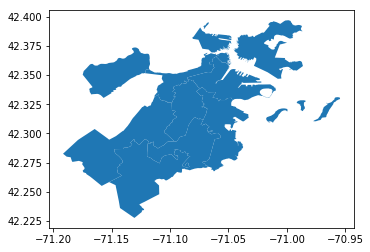

In [138]:

districts.plot()


In [139]:
loc = [Point(xy) for xy in zip(df['Long'],df['Lat'])]
#loc[:3]


In [140]:
df['geometry'] = loc
temp = df[df.Long <-10]
misdaad = gpd.GeoDataFrame(temp,geometry = temp['geometry'])
misdaad.crs = {'init': 'epsg:4326'}
#temp.head(21)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,geometry
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",POINT (-71.13937052999999 42.35779134)
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",POINT (-71.06030035000001 42.30682138)
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",POINT (-71.07242943 42.34658879)
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",POINT (-71.07866441 42.33418175)
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",POINT (-71.09036101 42.27536542)
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)",POINT (-71.07159012 42.29019621)
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)",POINT (-71.0827326 42.30607218)
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,2018-09-03 20:39:37,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)",POINT (-71.10555088 42.32701648)
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)",POINT (-71.07085307 42.33152148)
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,NaN,2018-09-03 20:38:00,2018,9,Monday,20,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)",POINT (-71.05860832 42.29514664)


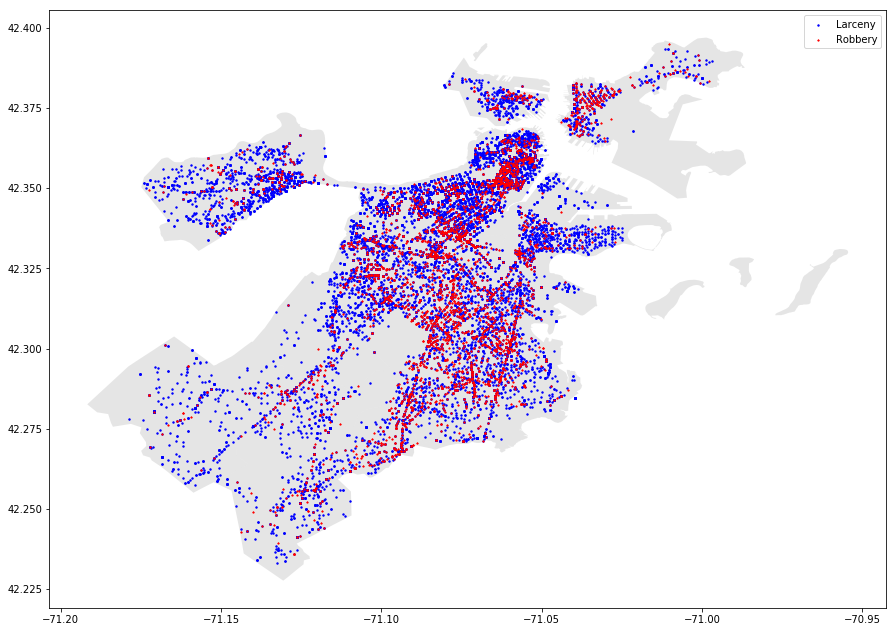

In [141]:
fig,ax = plt.subplots(figsize =(15,15))
districts.to_crs(epsg=4326).plot(ax=ax, alpha = 0.2, color = 'grey')
misdaad[misdaad['OFFENSE_CODE_GROUP']=='Larceny'].plot(ax = ax, markersize = 2, color = 'blue', marker = 'o',label = 'Larceny')
misdaad[misdaad['OFFENSE_CODE_GROUP']=='Robbery'].plot(ax = ax, markersize = 2, color = 'red', marker = '*',label = 'Robbery')
#misdaad[misdaad['OFFENSE_CODE_GROUP']=='Auto Theft'].plot(ax = ax, markersize = 2, color = 'yellow', marker = '*',label = 'car theft')
ax.legend()

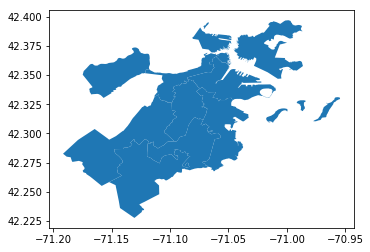

In [76]:
districts.to_crs(epsg=4326).plot()


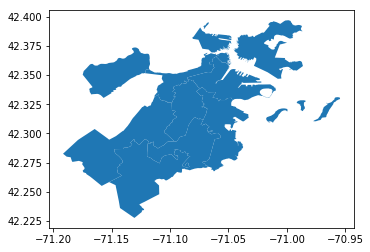

In [71]:
districts.plot()

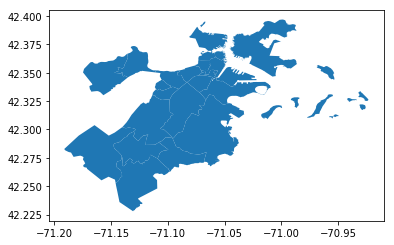

In [12]:
districts = gpd.read_file("/Volumes/Seagate Backup Plus Drive/Data/Python_data/deep_learning/crimes-in-boston/bostonGeoData/Boston_Neighborhoods/Boston_Neighborhoods.shp")
districts.plot()

In [143]:
type_ellende=df['OFFENSE_CODE_GROUP'].unique().tolist()
#type_ellende.drop_duplicates(keep=False, inplace=True)
type_ellende

['Larceny',
 'Vandalism',
 'Towed',
 'Investigate Property',
 'Motor Vehicle Accident Response',
 'Auto Theft',
 'Verbal Disputes',
 'Robbery',
 'Fire Related Reports',
 'Other',
 'Property Lost',
 'Medical Assistance',
 'Assembly or Gathering Violations',
 'Larceny From Motor Vehicle',
 'Residential Burglary',
 'Simple Assault',
 'Restraining Order Violations',
 'Violations',
 'Harassment',
 'Ballistics',
 'Property Found',
 'Police Service Incidents',
 'Drug Violation',
 'Warrant Arrests',
 'Disorderly Conduct',
 'Property Related Damage',
 'Missing Person Reported',
 'Investigate Person',
 'Fraud',
 'Aggravated Assault',
 'License Plate Related Incidents',
 'Firearm Violations',
 'Other Burglary',
 'Arson',
 'Bomb Hoax',
 'Harbor Related Incidents',
 'Counterfeiting',
 'Liquor Violation',
 'Firearm Discovery',
 'Landlord/Tenant Disputes',
 'Missing Person Located',
 'Auto Theft Recovery',
 'Service',
 'Operating Under the Influence',
 'Confidence Games',
 'Search Warrants',
 'Licens

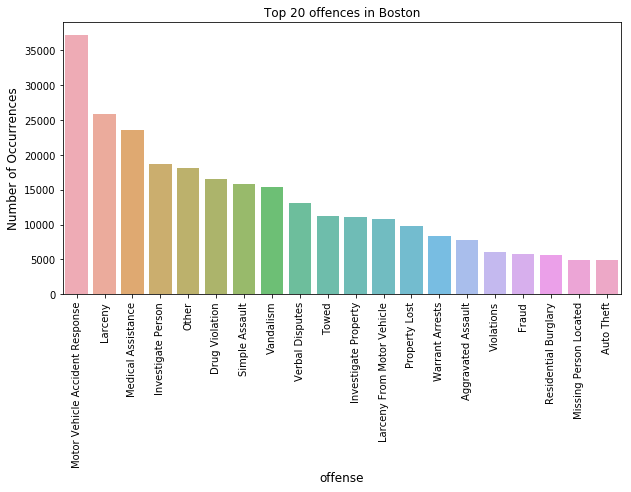

In [171]:

import seaborn as sns
ellende_count  = df['OFFENSE_CODE_GROUP'].value_counts()
ellende_count = ellende_count[:20,]
plt.figure(figsize=(10,5))
kaart=sns.barplot(ellende_count.index, ellende_count.values, alpha=0.8)
plt.title('Top 20 offences in Boston')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('offense', fontsize=12)
kaart.set_xticklabels(kaart.get_xticklabels(), rotation=90) 

plt.show()